In [14]:
import numpy as np,pandas as pd;
from google.colab.patches import cv2_imshow
from google.colab import  files
uploaded=files.upload()
uploaded


Saving babies.csv to babies.csv


{'babies.csv': b'case,gestation,parity,age,height,weight,smoke,bwt\r\n1,284,0,27,62,100,0,120\r\n2,282,0,33,64,135,0,113\r\n3,279,0,28,64,115,1,128\r\n4,NA,0,36,69,190,0,123\r\n5,282,0,23,67,125,1,108\r\n6,286,0,25,62,93,0,136\r\n7,244,0,33,62,178,0,138\r\n8,245,0,23,65,140,0,132\r\n9,289,0,25,62,125,0,120\r\n10,299,0,30,66,136,1,143\r\n11,351,0,27,68,120,0,140\r\n12,282,0,32,64,124,1,144\r\n13,279,0,23,63,128,1,141\r\n14,281,0,36,61,99,1,110\r\n15,273,0,30,63,154,0,114\r\n16,285,0,38,63,130,0,115\r\n17,255,0,25,65,125,1,92\r\n18,261,0,33,60,125,1,115\r\n19,261,0,33,68,170,0,144\r\n20,288,0,43,66,142,1,119\r\n21,270,0,22,56,93,0,105\r\n22,274,0,27,67,175,1,115\r\n23,287,0,25,66,145,0,137\r\n24,276,0,30,68,182,0,122\r\n25,294,0,23,65,122,0,131\r\n26,261,0,27,65,112,1,103\r\n27,280,0,26,58,106,0,146\r\n28,266,0,20,65,175,1,114\r\n29,292,0,32,65,125,0,125\r\n30,274,0,28,66,132,1,114\r\n31,270,0,26,61,105,0,122\r\n32,278,0,34,61,146,0,93\r\n33,268,0,30,66,123,0,130\r\n34,275,0,23,60,105,0,

In [21]:
data = np.genfromtxt(
    'babies.csv',
    delimiter=',',
    skip_header=1,
    dtype=float
)
#Display dataset shape
##Data shape
row,column=data.shape
print(f"row:{row}")
print(f"column:{column}")


row:1236
column:8


In [36]:
print("Loaded data(first 5 Rows)")
print(data[:5])
##Loaded data shape
row,column=data.shape


Loaded data(first 5 Rows)
[[  1.   284.     0.    27.    62.   100.     0.   120.  ]
 [  2.   282.     0.    33.    64.   135.     0.   113.  ]
 [  3.   279.     0.    28.    64.   115.     1.   128.  ]
 [  4.   279.34   0.    36.    69.   190.     0.   123.  ]
 [  5.   282.     0.    23.    67.   125.     1.   108.  ]]


In [25]:
##Replace the Nan value with column mean
data_clear_data=np.where(
    np.isnan(data),
    np.nanmean(data,axis=0),
    data
)
data_clear_data

array([[1.000e+00, 2.840e+02, 0.000e+00, ..., 1.000e+02, 0.000e+00,
        1.200e+02],
       [2.000e+00, 2.820e+02, 0.000e+00, ..., 1.350e+02, 0.000e+00,
        1.130e+02],
       [3.000e+00, 2.790e+02, 0.000e+00, ..., 1.150e+02, 1.000e+00,
        1.280e+02],
       ...,
       [1.234e+03, 2.910e+02, 0.000e+00, ..., 1.500e+02, 1.000e+00,
        1.300e+02],
       [1.235e+03, 2.810e+02, 1.000e+00, ..., 1.100e+02, 0.000e+00,
        1.250e+02],
       [1.236e+03, 2.970e+02, 0.000e+00, ..., 1.290e+02, 0.000e+00,
        1.170e+02]])

In [27]:
np.savetxt(
    'data_clear_data.csv',
    data_clear_data,
    delimiter=',',
    fmt='%0.2f',
    header='Coloum1,Column2,Column3,Column4,Column5,Coloum6,Column7,Column8',
    comments=''
)
if np.savetxt==True:
  print("Clear data has been saved!!(data_clear_data.csv)")

In [28]:
##Read thr dataset
data=np.genfromtxt('data_clear_data.csv',delimiter=',',
                   skip_header=1,dtype=float)
data


array([[1.000e+00, 2.840e+02, 0.000e+00, ..., 1.000e+02, 0.000e+00,
        1.200e+02],
       [2.000e+00, 2.820e+02, 0.000e+00, ..., 1.350e+02, 0.000e+00,
        1.130e+02],
       [3.000e+00, 2.790e+02, 0.000e+00, ..., 1.150e+02, 1.000e+00,
        1.280e+02],
       ...,
       [1.234e+03, 2.910e+02, 0.000e+00, ..., 1.500e+02, 1.000e+00,
        1.300e+02],
       [1.235e+03, 2.810e+02, 1.000e+00, ..., 1.100e+02, 0.000e+00,
        1.250e+02],
       [1.236e+03, 2.970e+02, 0.000e+00, ..., 1.290e+02, 0.000e+00,
        1.170e+02]])

In [32]:
#Mean
second_column=data[:,1]
mean=np.mean(second_column)
print(f"Mean:{mean}")
#Median
Median=np.median(second_column)
print(f"Median:{Median}")
##Standard_deviation
Mode=np.std(second_column)
print(f"Mode:{Mode}")
##variance
Variance=np.var(second_column)
print(f"Variance:{Variance}")

Mean:279.33852750809064
Median:280.0
Mode:15.936663072004833
Variance:253.97722987060254


In [35]:
##filter rows where the first column value>50
filter_data=data[data[:,0]>50]
filter_data

array([[5.100e+01, 2.580e+02, 0.000e+00, ..., 1.300e+02, 0.000e+00,
        1.150e+02],
       [5.200e+01, 2.830e+02, 0.000e+00, ..., 1.480e+02, 1.000e+00,
        1.080e+02],
       [5.300e+01, 2.820e+02, 0.000e+00, ..., 1.100e+02, 0.000e+00,
        1.020e+02],
       ...,
       [1.234e+03, 2.910e+02, 0.000e+00, ..., 1.500e+02, 1.000e+00,
        1.300e+02],
       [1.235e+03, 2.810e+02, 1.000e+00, ..., 1.100e+02, 0.000e+00,
        1.250e+02],
       [1.236e+03, 2.970e+02, 0.000e+00, ..., 1.290e+02, 0.000e+00,
        1.170e+02]])

In [39]:
##Load the dataset babies.csv using Nampy's genfortxt
uploaded=files.upload()
uploaded



Saving babies.csv to babies (1).csv
Loaded data
Row  data-set:1236
Column data-set:8


In [47]:
df=pd.read_csv('babies.csv')
df
print("Loaded data")
Row,Column=df.shape
print(f"Row  data-set:{Row}")
print(f"Column data-set:{Column}")

Loaded data
Row  data-set:1236
Column data-set:8


In [48]:
##check Missing Value
print("Missing Data set")
missing_data=df.isnull().sum()
print(f"Missing data:{missing_data}")

Missing Data set
Missing data:case          0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
bwt           0
dtype: int64


In [51]:
##Fill up the missing value
dataFrame_filling=df.fillna(df.mean())
dataFrame_filling

,case,gestation,parity,age,height,weight,smoke,bwt
0,1,284.000000,0,27.0,62.0,100.0,0.0,120
1,2,282.000000,0,33.0,64.0,135.0,0.0,113
2,3,279.000000,0,28.0,64.0,115.0,1.0,128
3,4,279.338512,0,36.0,69.0,190.0,0.0,123
4,5,282.000000,0,23.0,67.0,125.0,1.0,108
...,...,...,...,...,...,...,...,...
1231,1232,275.000000,1,27.0,60.0,100.0,0.0,113
1232,1233,265.000000,0,24.0,67.0,120.0,0.0,128
1233,1234,291.000000,0,30.0,65.0,150.0,1.0,130
1234,1235,281.000000,1,21.0,65.0,110.0,0.0,125


In [55]:
print("After replaceing Missing Data")
missing_data=dataFrame_filling.isnull().sum()
print(missing_data)

After replaceing Missing Data
case         0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
bwt          0
dtype: int64


In [58]:
##Computer various statistical mesuresments
mean_values=dataFrame_filling.mean();
median_values=dataFrame_filling.median()
standard_variance=dataFrame_filling.std()
Variance_values=dataFrame_filling.var()
skwness_values=dataFrame_filling.skew();
Covariance_values=dataFrame_filling.cov();
Correlation_values=dataFrame_filling.corr()

print(f"Mean values:{mean_values}")
print(f"median_values:{median_values}");
print(f"Stardarnd-Variance:{standard_variance}")
print(f"Variance Values:{Variance_values}")
print(f"Skewness-values:{skwness_values}")
print(f"Coviance-value:{Covariance_values}")
print(f"Correlation-values:{Correlation_values}")

Mean values:case         618.500000
gestation    279.338512
parity         0.254854
age           27.255267
height        64.047776
weight       128.625833
smoke          0.394780
bwt          119.576861
dtype: float64
median_values:case         618.5
gestation    280.0
parity         0.0
age           26.0
height        64.0
weight       126.0
smoke          0.0
bwt          120.0
dtype: float64
Stardarnd-Variance:case         356.946775
gestation     15.943114
parity         0.435956
age            5.776722
height         2.510743
weight        20.663939
smoke          0.487019
bwt           18.236452
dtype: float64
Variance Values:case         127411.000000
gestation       254.182879
parity            0.190057
age              33.370519
height            6.303829
weight          426.998380
smoke             0.237188
bwt             332.568177
dtype: float64
Skewness-values:case         0.000000
gestation   -0.782894
parity       1.126458
age          0.585034
height      -0.087418
w

In [62]:
bwt_filter_data=dataFrame_filling[dataFrame_filling['bwt']>70]
bwt_filter_data


,case,gestation,parity,age,height,weight,smoke,bwt
0,1,284.000000,0,27.0,62.0,100.0,0.0,120
1,2,282.000000,0,33.0,64.0,135.0,0.0,113
2,3,279.000000,0,28.0,64.0,115.0,1.0,128
3,4,279.338512,0,36.0,69.0,190.0,0.0,123
4,5,282.000000,0,23.0,67.0,125.0,1.0,108
...,...,...,...,...,...,...,...,...
1231,1232,275.000000,1,27.0,60.0,100.0,0.0,113
1232,1233,265.000000,0,24.0,67.0,120.0,0.0,128
1233,1234,291.000000,0,30.0,65.0,150.0,1.0,130
1234,1235,281.000000,1,21.0,65.0,110.0,0.0,125


In [65]:
outPut_file='process1.csv'
saveOutPutFile=dataFrame_filling.to_csv(outPut_file,index=False)
print(f"File will be save :{saveOutPutFile}")
print("Data has successfully saved")



File will be save :None
Data has successfully saved


In [67]:
import matplotlib.pyplot as plt
file_path='/content/data_clear_data.csv'
df=pd.read_csv(file_path)
df

,Coloum1,Column2,Column3,Column4,Column5,Coloum6,Column7,Column8
0,1.0,284.00,0.0,27.0,62.0,100.0,0.0,120.0
1,2.0,282.00,0.0,33.0,64.0,135.0,0.0,113.0
2,3.0,279.00,0.0,28.0,64.0,115.0,1.0,128.0
3,4.0,279.34,0.0,36.0,69.0,190.0,0.0,123.0
4,5.0,282.00,0.0,23.0,67.0,125.0,1.0,108.0
...,...,...,...,...,...,...,...,...
1231,1232.0,275.00,1.0,27.0,60.0,100.0,0.0,113.0
1232,1233.0,265.00,0.0,24.0,67.0,120.0,0.0,128.0
1233,1234.0,291.00,0.0,30.0,65.0,150.0,1.0,130.0
1234,1235.0,281.00,1.0,21.0,65.0,110.0,0.0,125.0


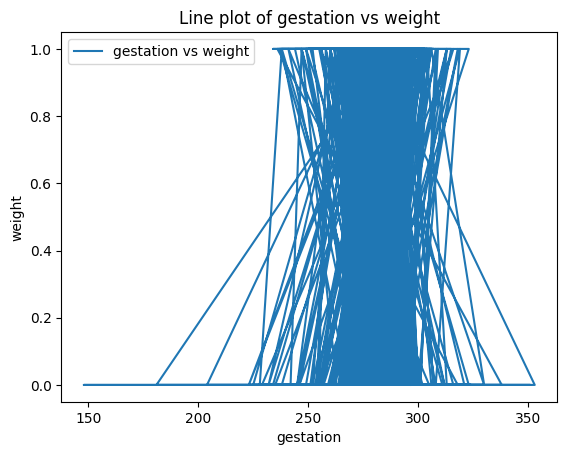

/tmp/ipython-input-1690520934.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


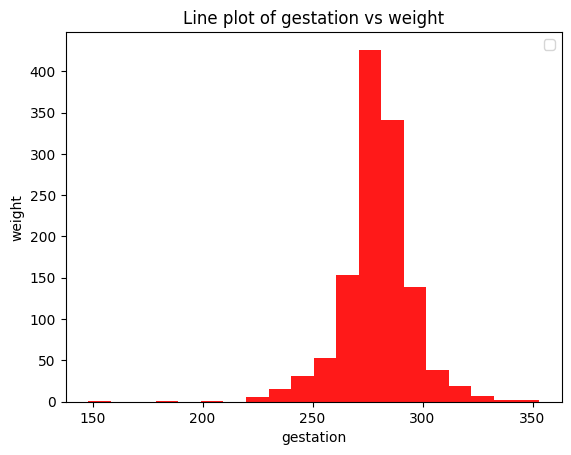

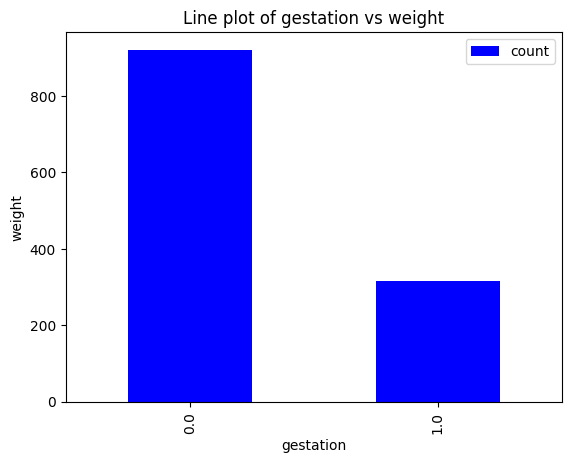

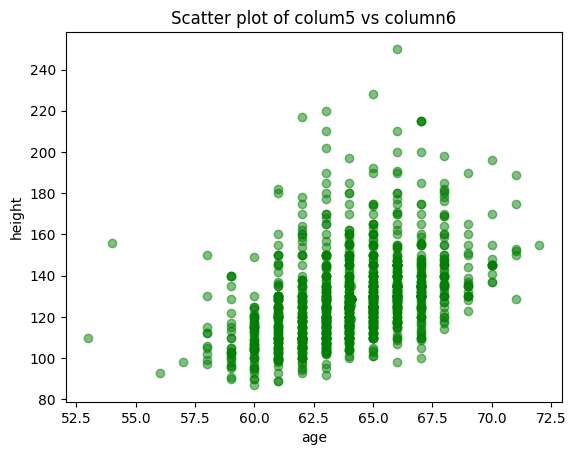

In [81]:
plt.plot(df['Column2'],df['Column3'],label="gestation vs weight")
plt.xlabel('gestation')
plt.ylabel('weight')
plt.title("Line plot of gestation vs weight")
plt.legend()
plt.show();

#################################################################
plt.hist(df['Column2'].dropna(),
         color='red',
         bins=20,
         alpha=0.9)
plt.xlabel('gestation')
plt.ylabel('weight')
plt.title("Line plot of gestation vs weight")
plt.legend()
plt.show();


################################################################
caterioes=df['Column3'].value_counts()
caterioes.plot(kind='bar',color='blue')
plt.xlabel('gestation')
plt.ylabel('weight')
plt.title("Line plot of gestation vs weight")
plt.legend()
plt.show();
########################################################
plt.scatter(df['Column5'],df['Coloum6'],color='green',
            alpha=0.5)
plt.xlabel('age')
plt.ylabel('height')
plt.title("Scatter plot of colum5 vs column6")
plt.show();


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import  files
file_path='/content/data_clear_data.csv'
df=pd.read_csv(file_path)
df

,Coloum1,Column2,Column3,Column4,Column5,Coloum6,Column7,Column8
0,1.0,284.00,0.0,27.0,62.0,100.0,0.0,120.0
1,2.0,282.00,0.0,33.0,64.0,135.0,0.0,113.0
2,3.0,279.00,0.0,28.0,64.0,115.0,1.0,128.0
3,4.0,279.34,0.0,36.0,69.0,190.0,0.0,123.0
4,5.0,282.00,0.0,23.0,67.0,125.0,1.0,108.0
...,...,...,...,...,...,...,...,...
1231,1232.0,275.00,1.0,27.0,60.0,100.0,0.0,113.0
1232,1233.0,265.00,0.0,24.0,67.0,120.0,0.0,128.0
1233,1234.0,291.00,0.0,30.0,65.0,150.0,1.0,130.0
1234,1235.0,281.00,1.0,21.0,65.0,110.0,0.0,125.0


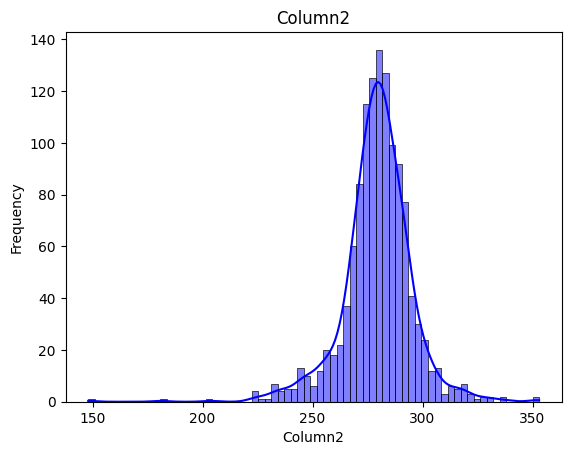

In [84]:
sns.histplot(df['Column2'],color='blue',kde=True)
plt.title("Column2")
plt.xlabel('Column2')
plt.ylabel('Frequency')
plt.show();

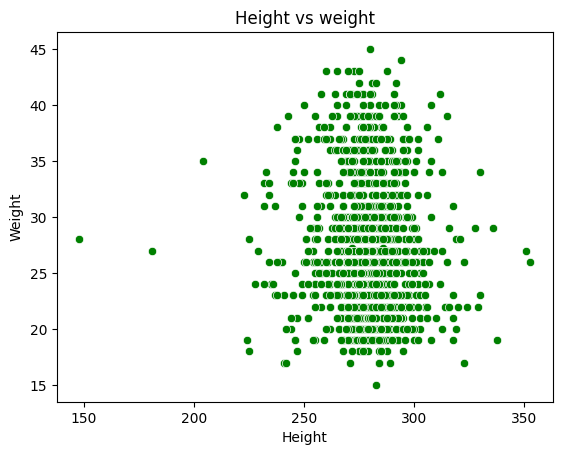

In [88]:
sns.scatterplot(x=df['Column2'],
                y=df['Column4'],
                data=df,color='green')
plt.title('Height vs weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

/tmp/ipython-input-1876076621.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


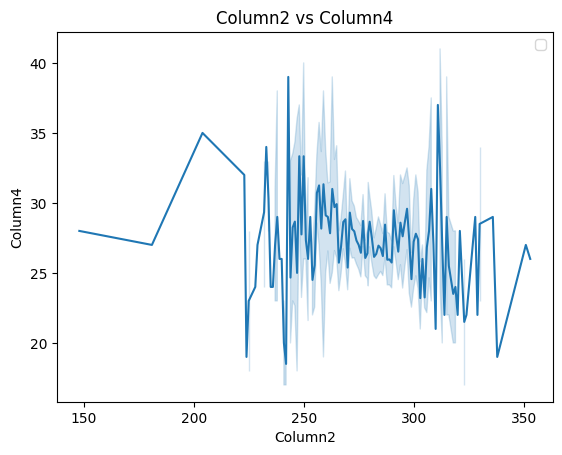

In [89]:
sns.lineplot(x=df['Column2'],y=df['Column4'],data=df)
plt.xlabel('Column2')
plt.ylabel('Column4')
plt.title("Column2 vs Column4")
plt.legend();
plt.show()

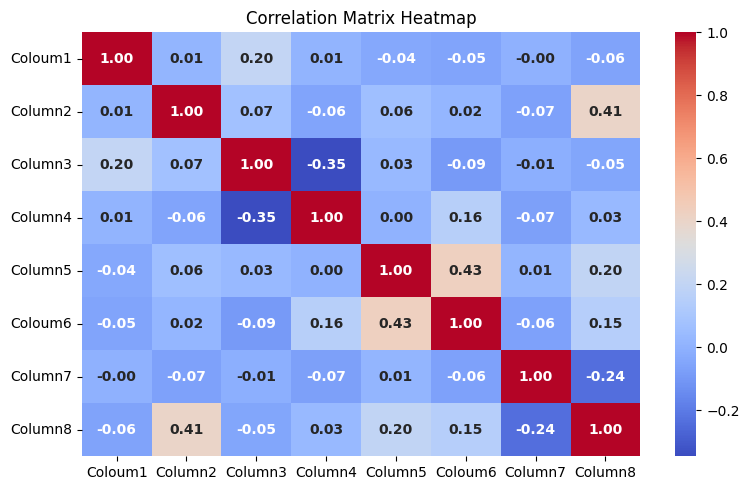

In [92]:
# Heatmap for correlation
# Compute the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(8, 5))
# Plot the heatmap with bold annotations
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={'weight': 'bold'}  # Fixed: used colon instead of comma
)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()